# Task Desription

Please read first the following abstract

## Abstract
                
RNA-Seq reveals an unprecedented complexity of the neuroblastoma transcriptome and is suitable for clinical endpoint prediction [ microarray ]

### Experiment Description  

We generated gene expression profiles from 498 primary neuroblastomas using RNA-Seq and microarrays. We sought to systematically evaluate the capability of RNA deep-sequencing (RNA-Seq)-based classification for clinical endpoint prediction in comparison to microarray-based ones. The neuroblastoma cohort was randomly divided into training and validation sets (**Please note:** <em>in the following we refer to this validation set as test set</em>), and 360 predictive models on six clinical endpoints were generated and evaluated. While prediction performances did not differ considerably between the two technical platforms, the RNA-Seq data processing pipelines, or feature levels (i.e., gene, transcript, and exon junction levels), RNA-Seq models based on the AceView database performed best on most endpoints. Collectively, our study reveals an unprecedented complexity of the neuroblastoma transcriptome, and provides guidelines for the development of gene expression-based predictive classifiers using high-throughput technologies.  Sample clinical characteristics definitions:  

* sex: 
    <ul>
    <li>M = male</li>
    <li>F = female</li>
    </ul>
    
* age at diagnosis: The age in days at diagnosis 
    <ul>
    <li>integer</li>
    </ul>

* high risk: Clinically considered as high-risk neuroblastoma
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>


* INSS stage: Disease stage according to International Neuroblastoma Staging System ([INSS](https://www.cancer.org/cancer/neuroblastoma/detection-diagnosis-staging/staging.html)) 
    <ul>
    <li>1</li>
    <li>2</li>
    <li>3</li>
    <li>4</li>
    <li>4S</li>
    </ul>


* progression: Occurrence of a tumor progression event
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>



* death from disease: Occurrence of death from the disease (yes=1; no=0) 
    <ul>
    <li>yes = 1</li>
    <li>no = 0</li>
    </ul>





Gene expression of 498 neuroblastoma samples was quantified by RNA sequencing as well as by microarray analyses in order to understand the neuroblastoma transcriptome and predict clinical endpoints. 


## Task

The task is to predict the missing values in the validation set (from here on called test set). Do this either with the RNASeq or the Microarray data, or potentially both?



## Code

To make your start a bit easier, here is a small notebook reading the data in. It finishes with a function enabling you to save your predictions for submission. 

#### from here, the code starts

First some imports 

In [1]:
import pandas as pd
import numpy as np

### Setting  up directory and filenames

In [2]:
#data_dir = '..{}data'.format(os.path.sep) 

fn_fpkm             = 'log2FPKM.tsv'
fn_patient_info     = 'patientInfo.tsv'
fn_prop_intensities = 'allProbIntensities.tsv'

In [3]:
import warnings
warnings.filterwarnings("ignore")


### Load the RNAs-Seq data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [4]:
df_fpkm = pd.read_csv(fn_fpkm, sep='\t').rename({'00gene_id':'gene_id'},axis=1)
df_fpkm = df_fpkm.set_index(['gene_id'])
df_fpkm.columns.name = 'ID'

df_fpkm.head()

ID,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,NB010,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.834381,0.743094,0.909414,0.795775,0.905540,0.869154,1.811352,0.599240,0.981855,1.066399,...,0.997977,1.003559,0.842437,1.057873,0.805515,0.491331,0.868249,0.911379,0.660139,1.152988
A1BG,1.910053,0.941996,1.950857,1.989477,1.942946,1.927608,1.617745,2.161291,1.436439,2.159797,...,2.336929,2.836360,1.205317,2.439868,1.649027,1.451425,1.493852,1.641241,1.994978,1.289534
A1BG-AS1,1.453191,0.640614,1.156765,1.525277,1.365043,0.899212,1.304178,1.189205,0.771248,1.114787,...,1.182908,1.367371,0.643751,1.096815,0.925425,0.933275,1.208723,0.904511,1.529221,1.102866
A1CF,0.005102,0.005902,0.005192,0.000000,0.025347,0.005682,0.000000,0.000000,0.021880,0.000000,...,0.024298,0.007295,0.000000,0.006678,0.005746,0.004998,0.004853,0.000000,0.022780,0.018720
A2LD1,0.580151,0.738233,0.927667,0.936497,0.924853,0.739038,1.018705,0.546324,0.666877,0.865850,...,0.673627,1.401265,0.837443,0.939849,0.743496,0.957837,0.812093,0.488748,1.068072,0.782887


### Load the Microarray data

This part already sets the indeces in the DataFrame. Please feel free to change as required. 

In [5]:
df_prop_intensities = pd.read_csv(fn_prop_intensities, sep='\t').set_index(['Reporter.Identifier'])
df_prop_intensities.columns.name = 'ID'

df_prop_intensities.head()

ID,GeneSymbols,NB001,NB002,NB003,NB004,NB005,NB006,NB007,NB008,NB009,...,NB489,NB490,NB491,NB492,NB493,NB494,NB495,NB496,NB497,NB498
Reporter.Identifier,,,,,,,,,,,,,,,,,,,,,
28913,NaN,14.99,14.94,12.48,14.63,11.89,15.09,13.07,12.00,11.70,...,13.62,13.03,14.98,13.36,13.90,13.00,13.79,14.70,14.03,12.31
27262,NaN,9.20,10.41,9.27,8.83,7.97,10.33,9.62,8.72,9.36,...,6.26,5.93,6.97,5.99,7.62,7.76,8.56,7.74,7.57,7.08
3180,NaN,5.06,5.26,6.45,2.89,2.00,4.80,3.05,6.39,6.43,...,0.93,0.58,1.26,1.38,3.49,2.07,2.26,2.29,2.63,2.54
41426,MBL1P,7.45,8.68,6.30,7.30,6.26,7.50,7.43,6.98,8.02,...,5.35,5.57,5.51,6.30,6.60,6.38,7.49,6.77,8.13,7.11
37033,NaN,6.74,6.63,6.75,6.20,6.57,6.01,6.78,4.80,5.15,...,4.58,4.61,3.54,4.55,4.20,7.16,7.07,5.07,6.28,6.34


### Load the patient factors, including the potential endpoints 

This part already sets the indeces in the DataFrame. Please feel free to change as required. 
Please note, that the ```FactorValues``` should have a 1-to-1 correspondence to the factors desc ribed in the abstract. 

In [6]:
df_patient_info = pd.read_csv(fn_patient_info, sep='\t').set_index('ID')
df_patient_info.columns.name = 'FactorValues'

df_patient_info

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB498,female,530,NaN,NaN,NaN,NaN
NB497,female,379,0.0,0.0,1,0.0
NB496,male,132,NaN,NaN,NaN,NaN
NB495,male,163,0.0,0.0,1,0.0
NB494,male,56,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
NB005,female,536,1.0,1.0,4,1.0
NB004,female,335,NaN,NaN,NaN,NaN
NB003,female,625,1.0,1.0,4,1.0


####  Divide into training and external testing

As you might have already noticed, we removed some of the factor values for some of the patient **ID**s.
Every row, where this information is missing indicate a real validation entry. We can use this information and create two separate DataFrames, one for training, one for the validation (testing). 

The task is to predict the missing values, either with the RNASeq or the Microarray data, or potentially both?



In [7]:
df_patient_info_train  = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].notna()]
df_patient_info_test   = df_patient_info[df_patient_info['FactorValue..death.from.disease.'].isna()]
df_patient_info_train = df_patient_info_train.sort_index(ascending = True)
df_patient_info_test = df_patient_info_test.sort_index(ascending = True)

In [8]:
df_patient_info_train.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB001,male,987,1.0,1.0,4,1.0
NB003,female,625,1.0,1.0,4,1.0
NB005,female,536,1.0,1.0,4,1.0
NB007,male,942,0.0,1.0,4,1.0
NB009,female,217,0.0,1.0,4S,0.0


In [9]:
df_patient_info_test.head()

FactorValues,FactorValue..Sex.,FactorValue..age.at.diagnosis.,FactorValue..death.from.disease.,FactorValue..high.risk.,FactorValue..inss.stage.,FactorValue..progression.
ID,,,,,,
NB002,male,1808,NaN,NaN,NaN,NaN
NB004,female,335,NaN,NaN,NaN,NaN
NB006,male,147,NaN,NaN,NaN,NaN
NB008,male,1652,NaN,NaN,NaN,NaN
NB010,male,379,NaN,NaN,NaN,NaN


In [10]:
label_dict = {'Death from Disease': df_patient_info_train['FactorValue..death.from.disease.'].astype(int), 
              'High Risk': df_patient_info_train['FactorValue..high.risk.'].astype(int),
              'Progression': df_patient_info_train['FactorValue..progression.'].astype(int),
              'INSS Stage': df_patient_info_train['FactorValue..inss.stage.'].astype(str),
              'Sex': df_patient_info_train['FactorValue..Sex.'].astype(str)}

In [11]:
# function to check if the labels are unbalanced
def balance(y, ratio = False):
    if ratio:
        ratios = []
        for i in range(len(y)):
            ratios.append(round((y[i]/y.sum())*100))
        y = y.to_frame()
        y['Ratio'] = ratios
        return y.T
    else:
        return y.value_counts().to_frame().T

In [12]:
balance(label_dict['Death from Disease'].value_counts(), ratio = True)

,0,1
FactorValue..death.from.disease.,198,51
Ratio,80,20


In [13]:
balance(label_dict['High Risk'].value_counts(), ratio = True)

,0,1
FactorValue..high.risk.,163,86
Ratio,65,35


In [14]:
balance(label_dict['Progression'].value_counts(), ratio = True)

,0,1
FactorValue..progression.,160,89
Ratio,64,36


In [15]:
balance(label_dict['INSS Stage'].value_counts(), ratio = True)

,4,1,2,3,4S
FactorValue..inss.stage.,91,60,40,30,28
Ratio,37,24,16,12,11


In [16]:
balance(label_dict['Sex'].value_counts(), ratio = True)

,male,female
FactorValue..Sex.,146,103
Ratio,59,41


## Analysis

From here on, you will need to use your skills ...

Some useful hints :
1. Exploratory analysis to better understand the data.
2. You might want to investigate trends and patters in data through some unsupervised learning.
3. When training a predictive model (aka known as classifiers) evaluate your model training performance using cross validation.
4. predictive performance metrics


### Note:
To be clear, there are **multiple** target features/attributes to predict. Say you want to build a model predicting **death from disease** of a patient, your target variable is ```'FactorValue..death.from.disease.'``` and the corresponding target vector <em>y</em> would be as follows:

```python
y_train = df_patient_info_train['FactorValue..death.from.disease.'].astype(int)
```
Taking the other data into account (RNASeq or microarray) as ``` X_train``` (you will have to preprocess and split this information yourselves), you could for example build a random forest model:

```python
from sklearn.ensemble import RandomForestClassifier
random_f_model_death = random_f_model = RandomForestClassifier() 
random_f_model_death.fit(X_train,y_train)
```
and predict ```y_test``` using ```X_test```. 

Obviously, you want to avoid any overfitting and might want to use appropriate validation approaches. 

Once you have your model and the prediction for the test data, you should be able to fill the ```'FactorValue..death.from.disease.'``` column in the test set. 

For the submission, please also include the confidence/probability/score for each of the prediction (assume ```1``` to be the value for the positive class). This only applies to the factors:  **high risk**, **progression** and **death from disease** . 

The other two factors need to be treated differently.  

Using this very rough outline, you should be able to predict all factors in the test data. 











# -----------------------------------------------------------------------------------------------------------
# STEPS

1. Inspect and clean the data (missing values)
    

2. Normalize the data (scaling)
    

3. Exploratory Analyses: Visualize the data
    - PCA
    - SE
    - Clustering:
        - Heirachical Dendogram
        - K Means

4. Feature Selection
    - Unsupervised
        - Variance Threshold
        - Closely Correlated
    - Supervised:
         - SelectKBest (f_classic)
         - visualize (heatmap, boxplots)
 

5. Model Selection (using Repeated Stratified KFold, Grid Search, ):
    - Options
        - Logistic Regression
        - Random Forest Classification
    - Strategies
        - SelectKBest
        - GridSearchCV
        - RepeatedStratifiedKFold
    
6. Choose Optimal Model:
    - predict on external test data
    - record the probability scores
    - extract table

This was not an entirely linear process!   

# Define Functions

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def normalize(df, scaler = RobustScaler()):
    df.columns = df.columns.map(str)
    numeric_features = list(df.select_dtypes(float).columns)
    numeric_transformer = Pipeline(steps=[ ('scaler', scaler)])
    preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features)])
    normalizer = Pipeline(steps=[('preprocessor', preprocessor)])
    df_norm = pd.DataFrame(normalizer.fit_transform(df[numeric_features]), columns = numeric_features, index=df.index)
    return df_norm

#https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
def correlation_drop(df_norm, cor):
    cor_matrix = df_norm.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = []
    for column in upper_tri.columns:
        if any(upper_tri[column] > cor) and column not in to_drop:
            to_drop.append(column)    
    df_norm = df_norm[df_norm.columns[~df_norm.columns.isin(to_drop)]]
    return df_norm

#https://www.numpyninja.com/post/feature-selection-selection-of-the-best-that-matters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # f_classif: num-in and cat-out
def kbest_topfeatures(df, label, score = f_classif, top = 50, show = True,
                     ticks_ = 10, legend_ = 12, axis_ = 14, title_ = 16, width = 7, height = 7):
    bestfeatures = SelectKBest(score_func = score, k = top)
    fit = bestfeatures.fit(df,label)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(df.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','f_classif Score']
    plt.figure(figsize = (width, height))
    featureScores.nlargest(top,'f_classif Score').plot(kind = 'barh')
    largest = featureScores.nlargest(top, 'f_classif Score')

    plt.xlabel('f_classic', fontsize = axis_)
    plt.ylabel('Features', fontsize = axis_)
    plt.title("Top {} Features by SelectKBest (f_classif)".format(top), fontsize = title_)
    plt.xticks(fontsize = ticks_)
    plt.yticks(fontsize = ticks_)
    if show:
        plt.show(block = False)
    else:
        plt.close()
    return df.iloc[:, largest.index]
    
    
def plot_graph(df, y, which = 'variance', colorPalette = 'bright', show = True, table = False, 
               ticks_ = 10, legend_ = 12, axis_ = 14, title_ = 16, width = 30, height = 10):
    
    plt_title = y.name[13:].replace('.', ' ')
    colors = dict(zip(y.unique(),sns.color_palette(colorPalette))) #incase I want to change the palette
    
    if which == 'variance':
        plt.figure(figsize = (5, 5))
        ax = sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], data=df, 
                             size=df_patient_info_train['FactorValue..Sex.'],
                             hue=y, palette=colors, edgecolor = 'white')
        plt.xlabel(df.columns[0], fontsize = axis_)
        plt.ylabel(df.columns[1], fontsize = axis_)
        plt.title("Scatter Plot of the Top 2 Varying Features for {}".format(plt_title.title()), fontsize = title_)
        plt.legend(title='Label', loc='upper right', fontsize = legend_, title_fontsize = legend_)
        plt.xticks(fontsize = ticks_)
        plt.yticks(fontsize = ticks_)

    elif which == 'pca':
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        pca.fit(df)
        pca_variance = pca.explained_variance_ratio_.tolist()
        pca_variance[0] = pca_variance[0]*100
        pca_variance[1] = pca_variance[1]*100
        pca1lab = "PCA 1" + ", " + str(round(pca_variance[0], 2)) + "%"
        pca2lab = "PCA 2" + ", " + str(round(pca_variance[1], 2)) + "%"
        df_pca = pd.DataFrame(pca.transform(df), index=df.index, columns=['pca_1','pca_2'])
        plt.figure(figsize = (7, 7))
        ax = sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], data=df, 
#                              size=df_patient_info_train['FactorValue..Sex.'].astype(str), 
                             hue=y, palette=colors, edgecolor = 'white')
        plt.xlabel(pca1lab, fontsize = axis_)
        plt.ylabel(pca2lab, fontsize = axis_)
        plt.title("Principal Component Analysis for {}".format(plt_title.title()), fontsize = title_)
        plt.legend(title='Label', loc='upper right', fontsize = legend_, title_fontsize = legend_)
        plt.xticks(fontsize = ticks_)
        plt.yticks(fontsize = ticks_)
        if show:
            plt.show(block = False)
        else:
            plt.close()
        if table:
            return df_pca

    elif which == 'se':
        from sklearn.manifold import SpectralEmbedding
        se = SpectralEmbedding(n_components=2)
        df_se = pd.DataFrame(se.fit_transform(df),index=df.index,columns=['se_1','se_2'])
        plt.figure(figsize = (7, 7))
        ax = sns.scatterplot(x=df_se.iloc[:,0], y=df_se.iloc[:,1], data=df, 
#                              size=df_patient_info_train['FactorValue..Sex.'], 
                             hue=y, palette=colors, edgecolor = 'white')
        plt.xlabel("SE 1", fontsize = axis_)
        plt.ylabel("SE 2", fontsize = axis_)
        plt.title("Spectral Embedding Analysis for {}".format(plt_title.title()), fontsize = title_)
        plt.legend(title='Label', loc='upper right', fontsize = legend_, title_fontsize = legend_)
        plt.xticks(fontsize = ticks_)
        if show:
            plt.show(block = False)
        else:
            plt.close()
        if table:
            return df_se
    
    elif which == 'dendogram':
        from scipy.cluster.hierarchy import dendrogram, linkage
        linked_p = linkage(df, 'ward') # ward has been found to be best for noisy data
        plt.figure(figsize = (width, height))
        dendrogram(linked_p,
                orientation = 'top',
                labels = df.index,
                show_leaf_counts=True)
        plt.xlabel("Features", fontsize = axis_)
        plt.ylabel("Height", fontsize = axis_)
        plt.title("Heirachical Clustering Dendogram of the Normalized Training Data", fontsize = title_)
        plt.yticks(fontsize = ticks_)
        if show:
            plt.show(block = False)
        else:
            plt.close()
        
    elif which == 'boxplot':
        Xy = pd.concat([df,y], axis=1)
        plot_data_melt = pd.melt(Xy,id_vars= y.name,
                        var_name = 'features',
                        value_name = 'value')
        plt.figure(figsize=(width, height))
        ax = sns.boxplot(x = 'features', y = 'value', hue = y.name, data = plot_data_melt)
        plt.xlabel('Report Identities', fontsize = axis_)
        plt.ylabel('Expression Values', fontsize = axis_)
        plt.title("Box Plot of the Top {} Features by SelectKBest for {}".format(len(df.columns), plt_title.title()), fontsize = title_)
        plt.legend(title='Label', loc='upper right', ncol=len(df.columns), fontsize = legend_, title_fontsize = legend_)
        plt.xticks(rotation = 65, fontsize = ticks_)
        plt.yticks(fontsize = ticks_)
        if show:
            plt.show(block = False)
        else:
            plt.close()
        
    elif which == 'heatmap':
        plt.figure(figsize=(width, height))
        ax = sns.heatmap(df.corr(), xticklabels = df.columns, yticklabels = df.columns)
        plt.xlabel('Report Identities', fontsize = axis_)
        plt.ylabel('Report Identities', fontsize = axis_)
        plt.title("Heatmap for the Top {} Features".format(len(df.columns)), fontsize = title_)
        plt.xticks(fontsize = ticks_)
        plt.yticks(fontsize = ticks_)
        if show:
            plt.show(block = False)
        else:
            plt.close()
        
    else:
        return False

In [18]:
## codes below adapted from https://www.kaggle.com/code/tanmayunhale/feature-selection-variance-threshold

from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df_norm, thr):
    var_thresholder = VarianceThreshold(threshold = thr)
    var_thresholder.fit(df_norm)
    new_columns = var_thresholder.get_support()
    return df_norm.iloc[:, new_columns]

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from numpy import mean
from numpy import std
def score(df_norm, label, clf, models, cv = 5, sc = 'g-mean'):
    X = df_norm
    y = label
    if sc == 'g-mean':
        name = sc
        sc = make_scorer(geometric_mean_score, greater_is_better=True)
    else:
        name = sc
    Score = pd.DataFrame({"Classifier": clf})
    score_df = []
    std_df = []
    for i in models:
        model = i
        n_scores = cross_val_score(model, X, y, scoring = sc, cv=cv, n_jobs=-1, error_score='raise')
        score_df.append(mean(n_scores))   
        std_df.append(std(n_scores))
    Score[name.title()] = score_df
    Score['StDev'] = std_df
    Score.sort_values(by = name.title(), ascending = False, inplace = True)
    Score.reset_index(drop = True, inplace = True)
    return Score

# def score_thr(df_norm, label, clf, models, thr_list, cv = 5, sc = 'accuracy'):
#     Score = pd.DataFrame({"Classifier":clf})
#     if sc == 'g-mean':
#         sc = make_scorer(geometric_mean_score, greater_is_better=True)
#     for k in range(len(thr_list)):
#         X_thresh = variance_threshold(df_norm, thr_list[k])
#         y = label
#         score_df = []
#         std_df = []
#         for i in models:
#             model = i
#             n_scores = cross_val_score(model, X_thresh, y, scoring=sc, cv=cv, n_jobs=-1, error_score='raise')
#             score_df.append(mean(n_scores))   
#             std_df.append(std(n_scores))
#         feat = str(thr_list[k])
#         Score[feat] = score_df
#         Score.sort_values(by = feat, ascending = False, inplace = True)
#         Score.reset_index(drop = True, inplace = True)
#     return Score

def highlight_max(data, color='aquamarine'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

### ----------------------------------------------------------------------------------
## INSPECT

In [19]:
# to drop the gene_symbols data for micro-array data strictly
df_ma = df_prop_intensities.drop(['GeneSymbols'], axis = 1)
df_microarray = df_ma.transpose()
df_microarray = df_microarray[df_patient_info['FactorValue..death.from.disease.'].notna()]
df_microarray 

Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
ID,,,,,,,,,,,,,,,,,,,,,
NB001,14.99,9.20,5.06,7.45,6.74,3.84,17.27,12.14,3.04,7.85,...,7.33,9.11,13.37,6.02,7.89,10.35,17.05,5.30,13.91,14.54
NB003,12.48,9.27,6.45,6.30,6.75,4.91,17.79,11.72,4.27,7.82,...,8.40,7.51,10.85,6.67,7.84,9.81,17.45,5.29,13.63,14.33
NB005,11.89,7.97,2.00,6.26,6.57,2.07,17.38,10.90,3.10,6.50,...,6.65,8.34,11.10,7.21,7.41,9.65,16.93,4.81,13.22,14.61
NB007,13.07,9.62,3.05,7.43,6.78,3.58,17.44,10.85,3.72,7.84,...,8.18,8.66,11.18,7.62,8.83,9.17,16.85,6.52,13.71,14.27
NB009,11.70,9.36,6.43,8.02,5.15,5.21,17.38,12.08,4.32,7.34,...,8.87,7.34,10.98,8.70,8.04,10.16,16.98,5.65,13.72,14.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB489,13.62,6.26,0.93,5.35,4.58,0.77,17.32,11.37,1.54,6.18,...,6.61,7.96,10.71,7.44,5.45,8.60,17.14,4.07,13.00,13.72
NB491,14.98,6.97,1.26,5.51,3.54,1.38,16.60,11.21,1.20,5.38,...,8.71,9.54,11.84,7.67,8.32,8.22,16.03,2.77,12.97,13.56
NB493,13.90,7.62,3.49,6.60,4.20,2.07,17.18,12.38,4.22,6.76,...,7.79,8.80,10.63,6.00,7.46,10.17,16.46,3.94,14.19,13.76


In [20]:
df_microarray.describe()

Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,...,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,13.493052,8.099558,2.694137,6.961807,5.647871,2.614217,17.326386,11.778353,2.658434,6.676225,...,8.113092,8.995060,11.716185,7.012972,7.700562,9.476948,16.779759,4.505382,13.675703,14.176627
std,1.102158,1.261394,1.330901,1.003220,1.395750,1.085894,0.547473,0.588951,1.246560,0.994254,...,1.227252,0.915886,1.347223,0.990048,1.109873,0.941391,0.522661,1.494867,0.514830,0.623668
min,9.990000,3.680000,0.490000,3.410000,1.380000,0.490000,14.830000,10.070000,0.000000,2.770000,...,4.690000,4.750000,8.200000,3.870000,3.460000,5.990000,13.960000,0.140000,12.060000,11.950000
25%,12.890000,7.340000,1.770000,6.330000,4.660000,1.850000,16.970000,11.400000,1.810000,6.190000,...,7.230000,8.520000,10.790000,6.450000,7.040000,8.980000,16.460000,3.500000,13.330000,13.830000
50%,13.600000,8.120000,2.490000,7.060000,5.870000,2.540000,17.360000,11.840000,2.580000,6.770000,...,8.080000,9.110000,11.820000,7.040000,7.850000,9.640000,16.830000,4.520000,13.730000,14.240000
75%,14.310000,9.060000,3.190000,7.670000,6.670000,3.140000,17.680000,12.220000,3.360000,7.350000,...,8.870000,9.620000,12.720000,7.610000,8.490000,10.150000,17.130000,5.770000,14.060000,14.560000
max,16.470000,10.530000,6.880000,10.270000,8.780000,8.590000,18.800000,13.020000,7.630000,8.570000,...,12.200000,10.850000,14.990000,9.700000,10.270000,11.370000,18.180000,7.340000,14.690000,15.760000


## CLEANING THE DATA
#### To see if anything is missing

In [21]:
print(df_microarray.isnull().values.sum() != 0) # if False, there are no missing values;
print(df_microarray.count().sum()) # should be 22264584, but this is 21558918
print(df_microarray.isnull().values.sum()) # 705666 missing values. this adds up with 21...18 to give 22...84!
print(df_microarray.columns[df_microarray.isnull().any()]) # the columns that have at least one null value...1417 columns. 
# worst case scenario, all rows are NA: 498*1417 = 705666; same as the sum of missing values i.e. these entire columns are missing for all the samples!
(df_microarray[df_microarray.columns[df_microarray.isnull().any()]].isnull().sum() * 100 // df_microarray.shape[0] != 100).count().sum() # 1417. further proof that all 1417 rows are completely missing

# so we should remove them!
empty_columns = df_microarray.columns[df_microarray.isnull().any()].tolist()
df_microarray = df_microarray.drop(empty_columns, axis = 1)
df_microarray[df_microarray.isnull().any(axis=1)] # no rows show. We have our cleaned dataset!

True
10779459
352833
Int64Index([45135, 45136,  6194, 45138,  3773,   343, 45137,   342, 45139,
            39011,
            ...
              596, 32764, 35023, 32762, 23698,  2294, 32008,  2295, 32007,
             2296],
           dtype='int64', name='Reporter.Identifier', length=1417)


Reporter.Identifier,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
ID,,,,,,,,,,,,,,,,,,,,,


In [22]:
df_ma_ = df_ma.transpose()[df_patient_info['FactorValue..death.from.disease.'].notna()]

In [23]:
empty_columns = df_ma_.columns[df_ma_.isnull().any()].tolist()
df_ma_[empty_columns]

Reporter.Identifier,45135,45136,6194,45138,3773,343,45137,342,45139,39011,...,596,32764,35023,32762,23698,2294,32008,2295,32007,2296
ID,,,,,,,,,,,,,,,,,,,,,
NB001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NB493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NORMALIZE

In [24]:
df_microarray_norm_b = normalize(df_microarray, RobustScaler())
df_microarray_norm = normalize(df_microarray_norm_b, MinMaxScaler())

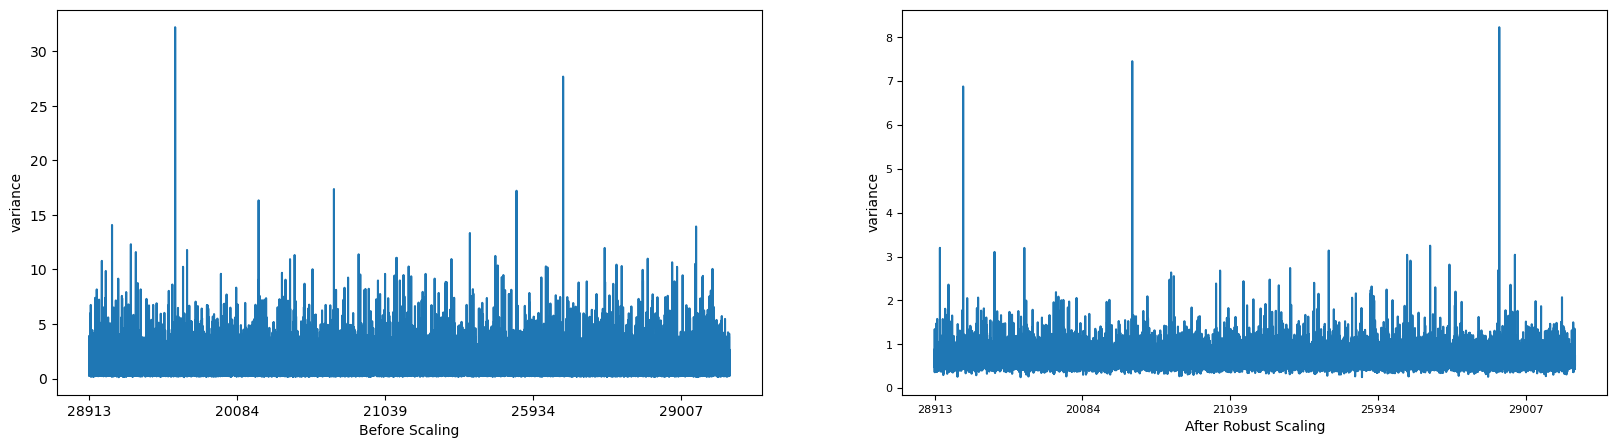

In [25]:
small = 8
medium = 10
bigger = 12

plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)

df_microarray.var().plot()
plt.xlabel('Before Scaling')
plt.ylabel('variance')
plt.rc('font', size=small)
plt.rc('axes', titlesize=small)    
plt.rc('axes', labelsize=medium)
plt.rc('figure', titlesize=bigger)

plt.subplot(1, 2, 2)
df_microarray_norm_b.var().plot()
plt.xlabel('After Robust Scaling')
plt.ylabel('variance')
plt.rc('font', size=small)
plt.rc('axes', titlesize=small)    
plt.rc('axes', labelsize=medium)
plt.rc('figure', titlesize=bigger)

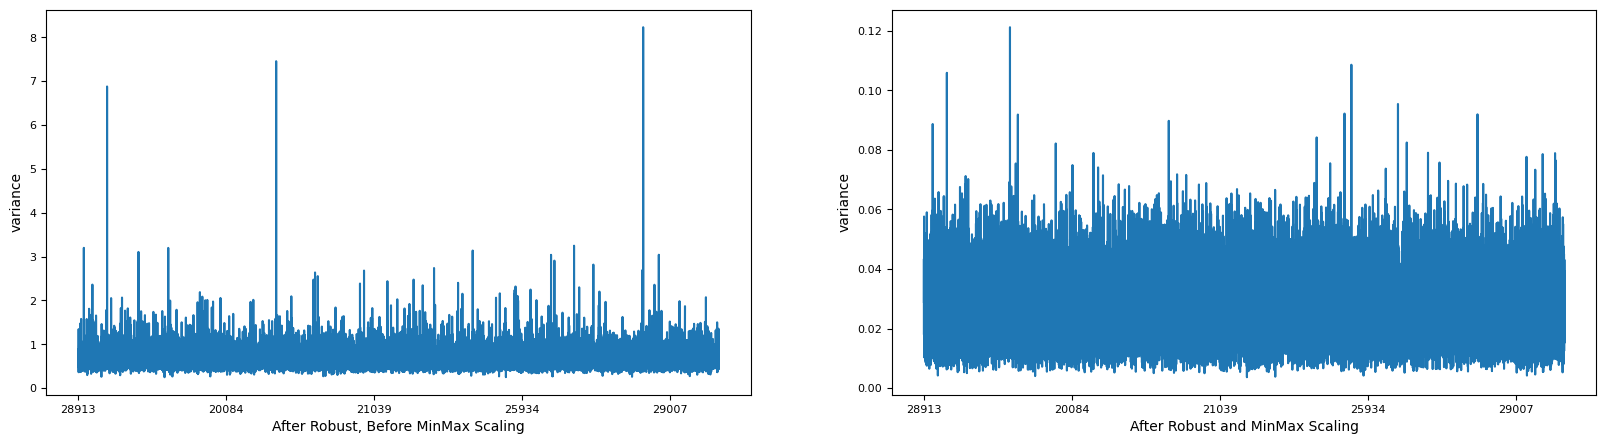

In [26]:
small = 8
medium = 10
bigger = 12

plt.figure(figsize = (20,5))

plt.subplot(1, 2, 1)
df_microarray_norm_b.var().plot()
plt.xlabel('After Robust, Before MinMax Scaling')
plt.ylabel('variance')
plt.rc('font', size=small)
plt.rc('axes', titlesize=small)    
plt.rc('axes', labelsize=medium)
plt.rc('figure', titlesize=bigger)

plt.subplot(1, 2, 2)
df_microarray_norm.var().plot()
plt.xlabel('After Robust and MinMax Scaling')
plt.ylabel('variance')
plt.rc('font', size=small)
plt.rc('axes', titlesize=small)    
plt.rc('axes', labelsize=medium)
plt.rc('figure', titlesize=bigger)

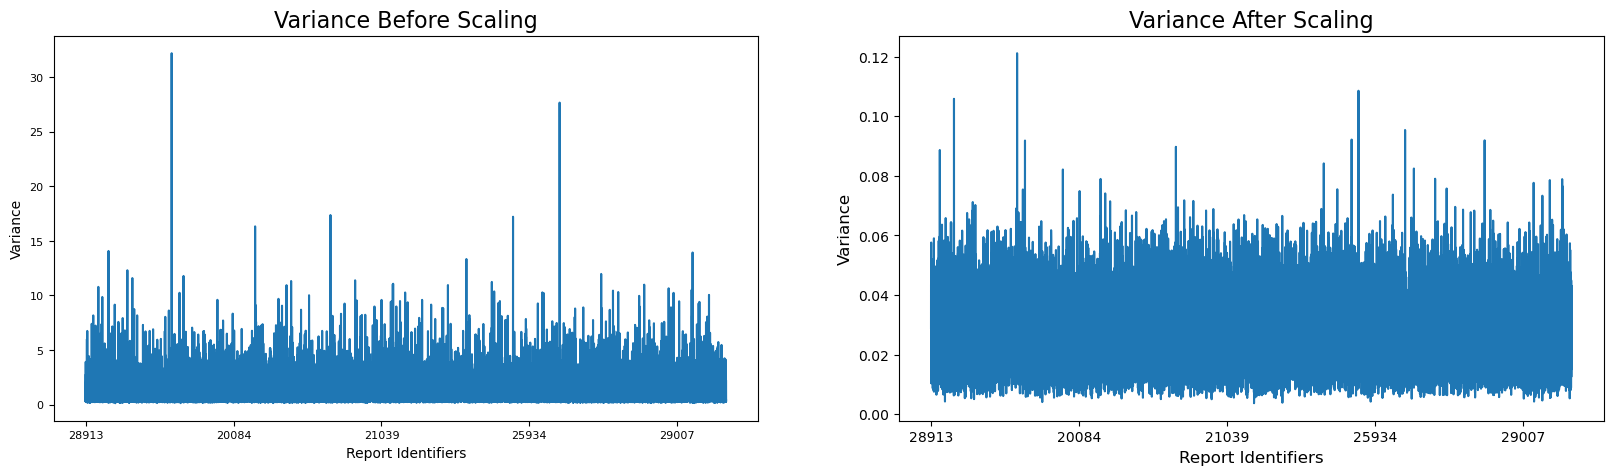

In [27]:
small = 10
medium = 12
bigger = 16

plt.figure(figsize = (20,5))

plt.subplot(1, 2, 1)
df_microarray.var().plot()
plt.title('Variance Before Scaling', fontsize = bigger)
plt.xlabel('Report Identifiers')
plt.ylabel('Variance')
plt.rc('font', size=small)
plt.rc('axes', titlesize=small)    
plt.rc('axes', labelsize=medium)

plt.subplot(1, 2, 2)
df_microarray_norm.var().plot()
plt.title('Variance After Scaling', fontsize = bigger)
plt.xlabel('Report Identifiers')
plt.ylabel('Variance')
plt.rc('font', size=small)
plt.rc('axes', titlesize=small)    
plt.rc('axes', labelsize=medium)

In [28]:
# plt.figure(figsize = (5,5))
# df_microarray_norm.var().plot.density()

## EXPLORATORY ANALYSES: Visualization

In this section, we can perform the exploratory analysis for any label, asides the age at diagnosis.
Exploratory Analysis includes:
- Scatter plot of the top two varying features 
    - note: the Sex label seems to be the one that splits the samples into clusters the most
- 2D Principal Component Analysis
- 2D Spectral Embedding
- Clustering
    - Heirachical: Dendogram (before normalizing, after normalizing)
    - Kmeans (variance top 2, pca top 2)
 

In [29]:
X = df_microarray_norm
X

,28913,27262,3180,41426,37033,6190,4123,21664,10745,13510,...,3319,34832,24669,33950,39350,22435,17350,28875,8993,32006
ID,,,,,,,,,,,,,,,,,,,,,
NB001,0.771605,0.805839,0.715180,0.588921,0.724324,0.413580,0.614610,0.701695,0.398427,0.875862,...,0.351531,0.714754,0.761414,0.368782,0.650514,0.810409,0.732227,0.716667,0.703422,0.679790
NB003,0.384259,0.816058,0.932707,0.421283,0.725676,0.545679,0.745592,0.559322,0.559633,0.870690,...,0.494008,0.452459,0.390280,0.480274,0.643172,0.710037,0.827014,0.715278,0.596958,0.624672
NB005,0.293210,0.626277,0.236307,0.415452,0.701351,0.195062,0.642317,0.281356,0.406291,0.643103,...,0.260985,0.588525,0.427099,0.572899,0.580029,0.680297,0.703791,0.648611,0.441065,0.698163
NB007,0.475309,0.867153,0.400626,0.586006,0.729730,0.381481,0.657431,0.264407,0.487549,0.874138,...,0.464714,0.640984,0.438881,0.643225,0.788546,0.591078,0.684834,0.886111,0.627376,0.608924
NB009,0.263889,0.829197,0.929577,0.672012,0.509459,0.582716,0.642317,0.681356,0.566186,0.787931,...,0.556591,0.424590,0.409426,0.828473,0.672540,0.775093,0.715640,0.765278,0.631179,0.734908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB489,0.560185,0.376642,0.068858,0.282799,0.432432,0.034568,0.627204,0.440678,0.201835,0.587931,...,0.255659,0.526230,0.369661,0.612350,0.292217,0.485130,0.753555,0.545833,0.357414,0.464567
NB491,0.770062,0.480292,0.120501,0.306122,0.291892,0.109877,0.445844,0.386441,0.157274,0.450000,...,0.535286,0.785246,0.536082,0.651801,0.713656,0.414498,0.490521,0.365278,0.346008,0.422572
NB493,0.603395,0.575182,0.469484,0.465015,0.381081,0.195062,0.591940,0.783051,0.553080,0.687931,...,0.412783,0.663934,0.357879,0.365352,0.587372,0.776952,0.592417,0.527778,0.809886,0.475066


## Visualization: Top 2 Varying Features

In [30]:
X = X[X.var().sort_values(ascending = False).index.tolist()]

In [31]:
y = label_dict['Death from Disease']

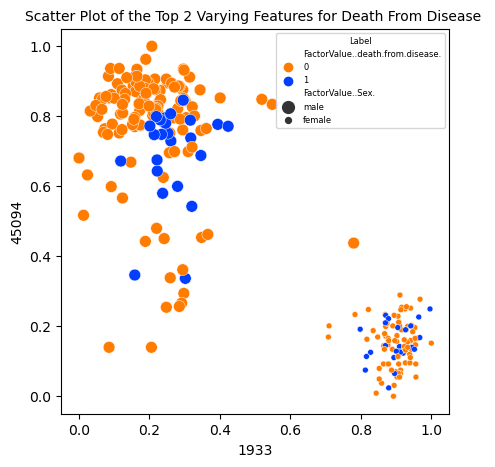

In [32]:
plot_graph(X, y, title_ = 10, axis_ = 10, legend_ = 6)

For all the labels, 'Sex' is the one that corresponds to the distinctive natural clustering shown in the scatterplot of the top 2 varying genes. The rest are mixed. Hence, I made the scatter plot vary by size in terms of the 'Sex'

## Visualization: PCA and SE Analysis

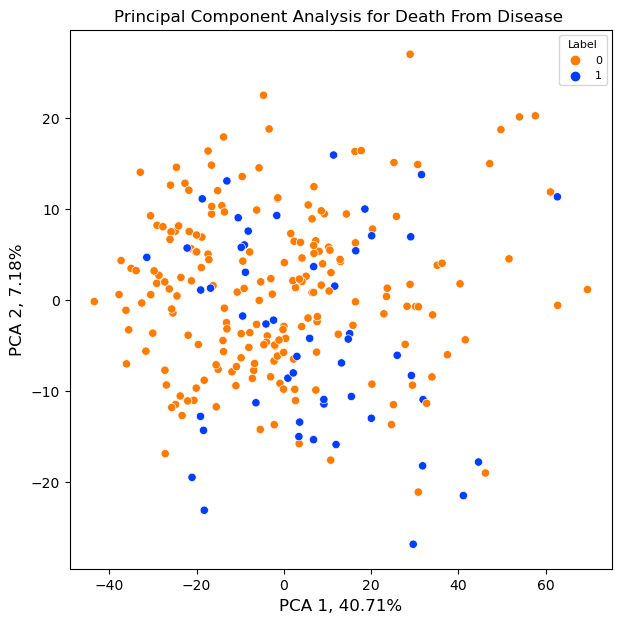

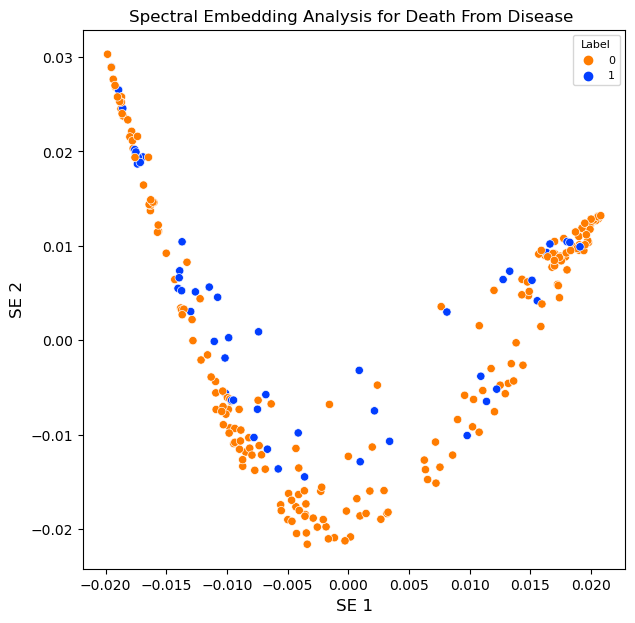

In [33]:
y = label_dict['Death from Disease']
plot_graph(X, y, "pca", title_ = 12, axis_ = 12, legend_ = 8)
plot_graph(X, y, "se", title_ = 12, axis_ = 12, legend_ = 8)

## Visualization: Heirachical Dendogram Clustering

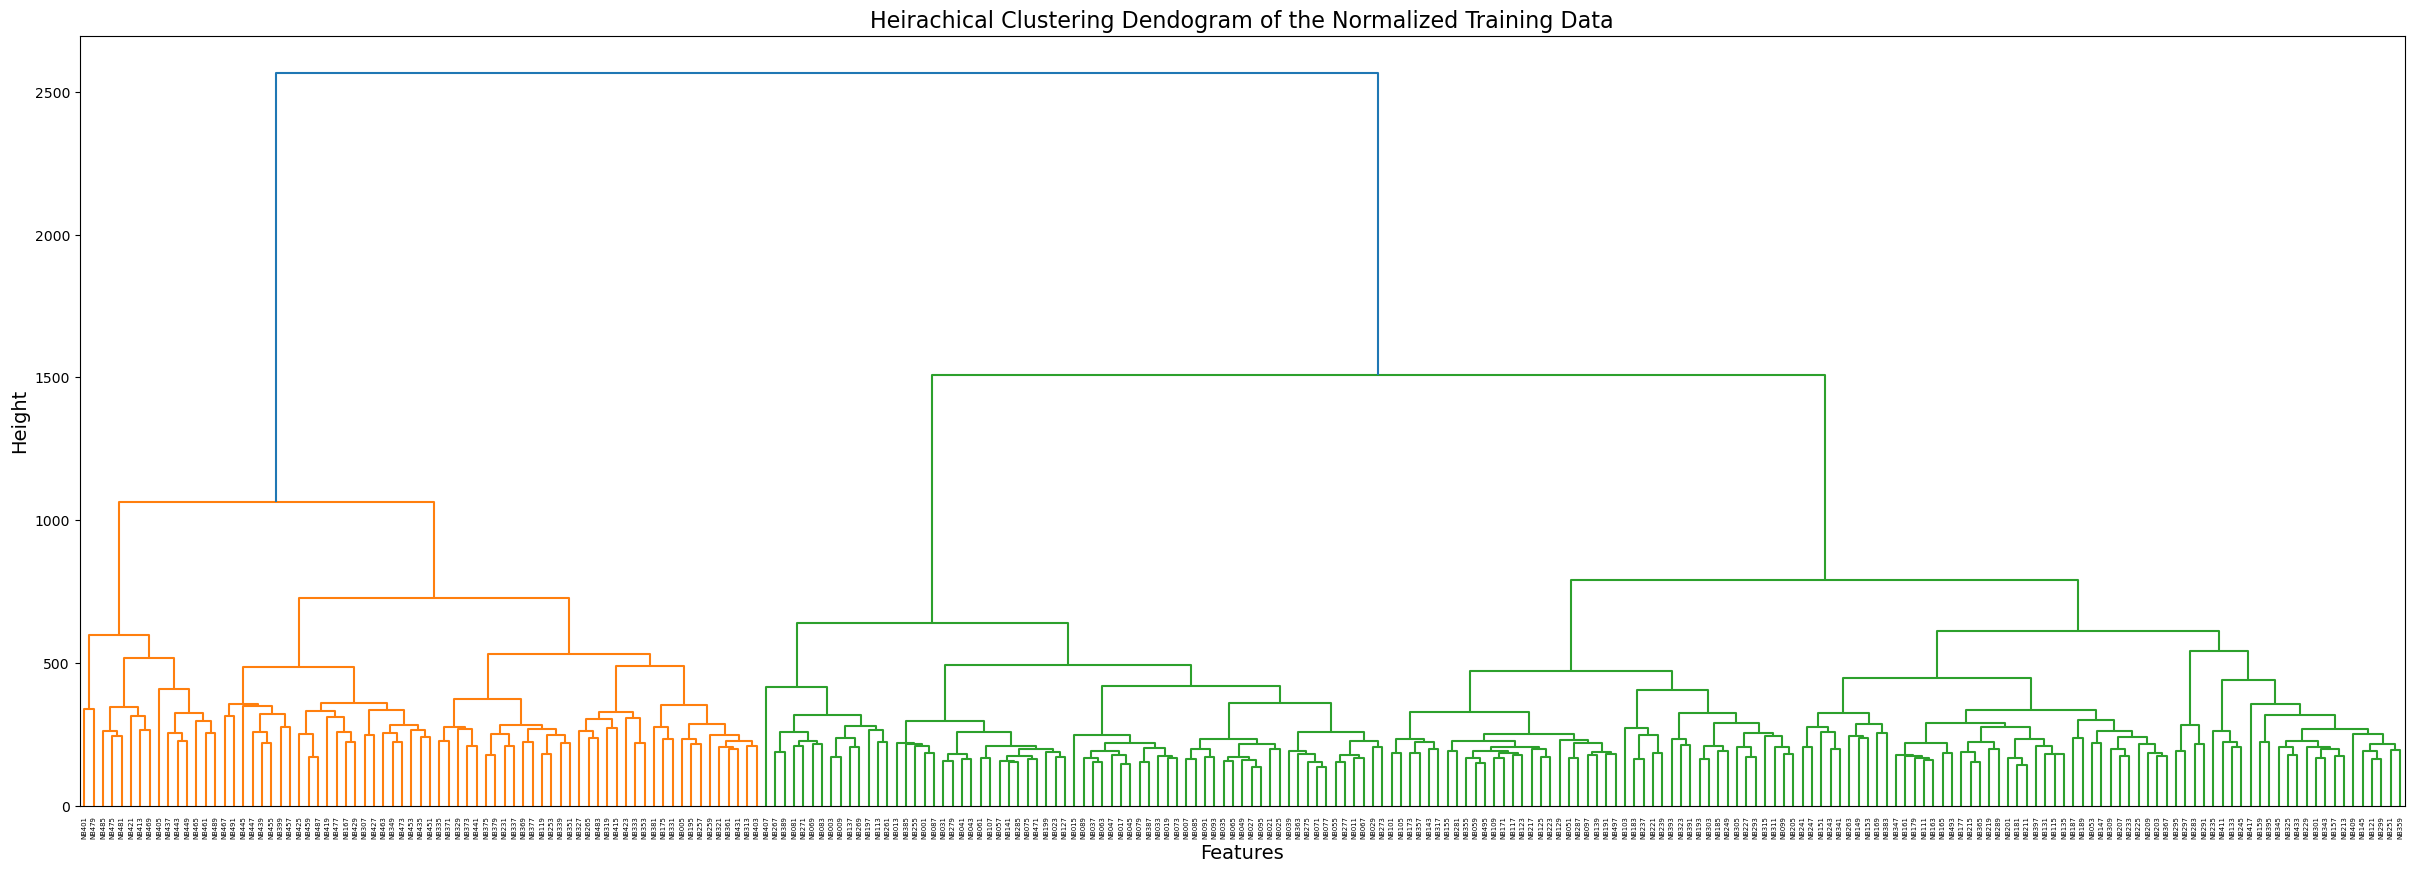

In [34]:
plot_graph(df_microarray, y, "dendogram") # after cleaning, before normalizing

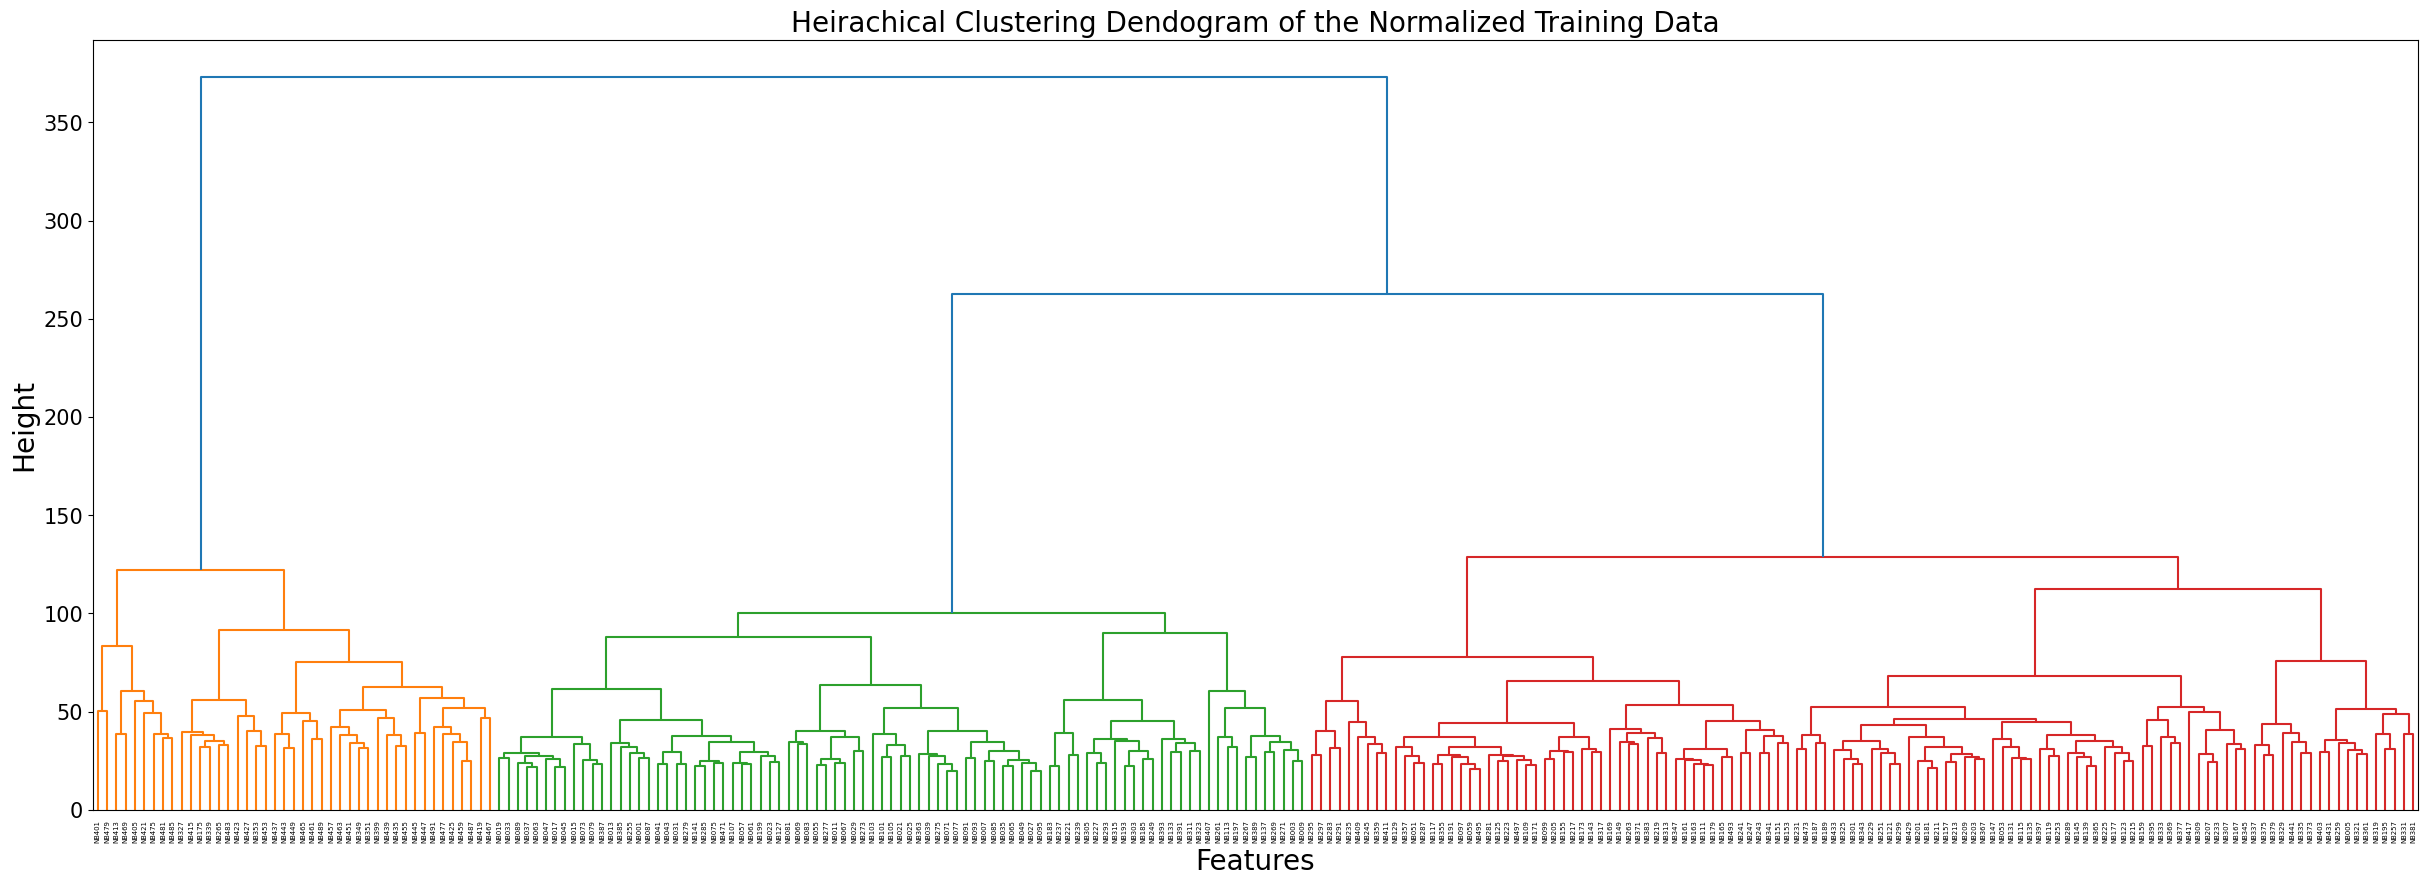

In [35]:
plot_graph(X, y, "dendogram", title_ = 20, axis_ = 20, ticks_ = 15)  # after normalizing

## Visualization: K Means Clustering

The top-2-varying-feature scatter plot shows two clear clusters without labels. Hence, we expect k means to accurately create an optimal clustering at k = 2. Let us verify below.

,Distortion Score
k,
2,6.283658
3,3.121201
4,2.382680
5,1.976209
6,1.708808


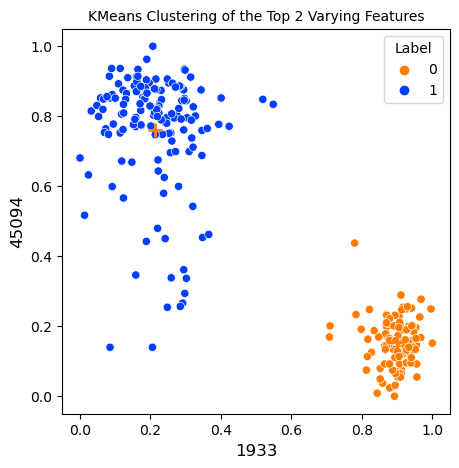

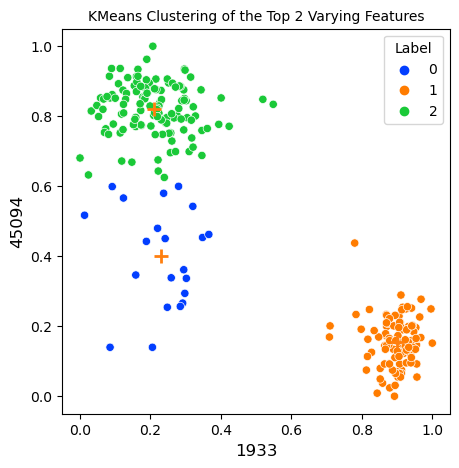

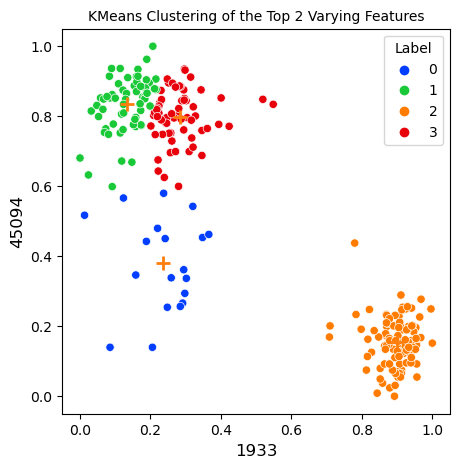

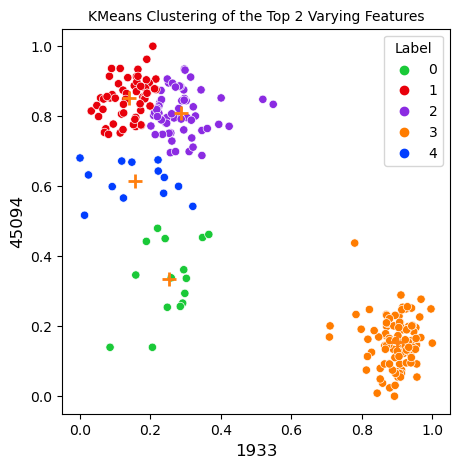

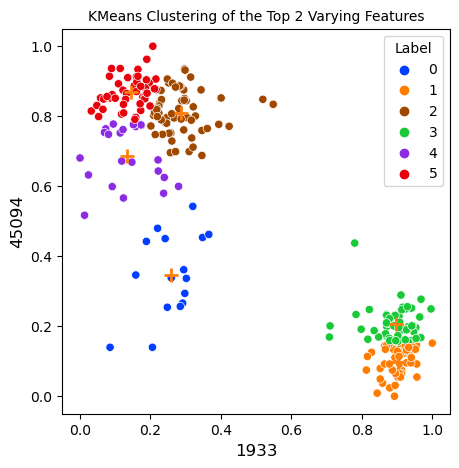

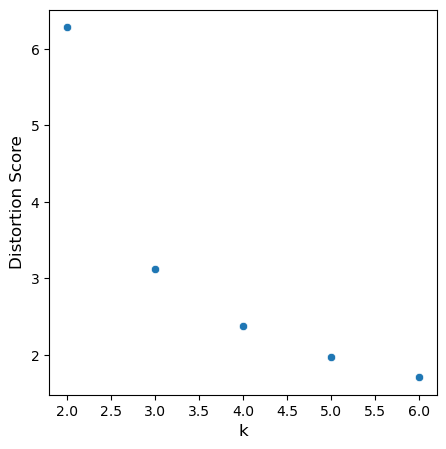

In [36]:
from sklearn.cluster import KMeans
from sklearn import metrics

X_kmeans = X.iloc[:, :2]

kmeans_distortion_score = {}
kmeans_silhouette_score = {}

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, init='random').fit(X_kmeans.iloc[:,:2])
    kmeans_centroids_plt = pd.DataFrame(kmeans.cluster_centers_, columns = X_kmeans.columns.values.tolist()[:2])
    X_kmeans['cluster_k{}'.format(k)] = kmeans.labels_
    kmeans_distortion_score[k] = kmeans.inertia_
    colorPalette = 'bright'
    colors = dict(zip(X_kmeans['cluster_k{}'.format(k)].unique(),sns.color_palette(colorPalette)))
    plt.figure(figsize = (5, 5))
    ax = sns.scatterplot(x=X_kmeans.iloc[:,0], y=X_kmeans.iloc[:,1], hue='cluster_k{}'.format(k), palette=colors, data=X_kmeans, edgecolor='white')
    ax = sns.scatterplot(x=kmeans_centroids_plt.iloc[:,0], y=kmeans_centroids_plt.iloc[:,1], data=kmeans_centroids_plt, linewidth=2.0, marker='+', s=100)
    plt.title("KMeans Clustering of the Top 2 Varying Features", fontsize = 10)
    plt.legend(title='Label', loc='upper right', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

df_scores = pd.DataFrame()
df_scores['Distortion Score'] = pd.Series(kmeans_distortion_score)
df_scores.index.name='k'

fig = plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='k', y='Distortion Score', data=df_scores)

df_scores

As expected, k means accurately creates those clusters for k = 2, which seems to be the likely optimal clustering number, based on the slight elbow observed in the Distortion Plot

### K means for PCA

Let's try K Means for PCA.
We would expect bad clustering, since the data itself doesn't look cleanly separable in any way as it is.

In [37]:
pca_df = plot_graph(X, y, "pca", show = False, table = True)
se_df = plot_graph(X, y, "se", show = False, table = True)

,Distortion Score
k,
2,65439.452082
3,40391.463930
4,33620.344565
5,26647.035307
6,21554.227239


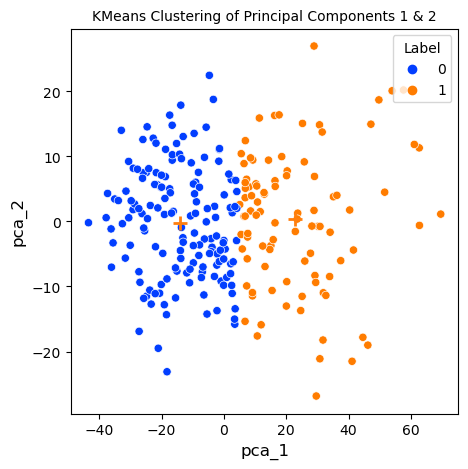

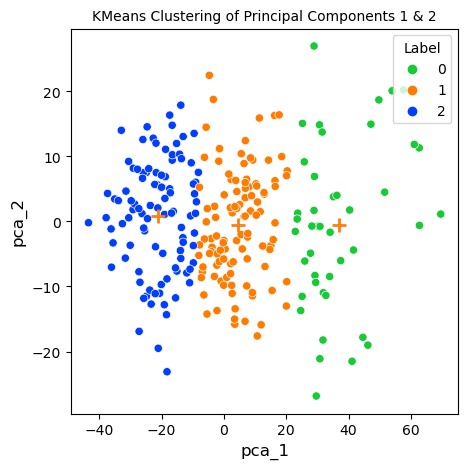

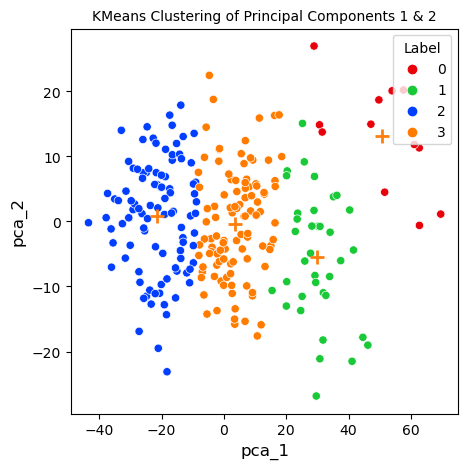

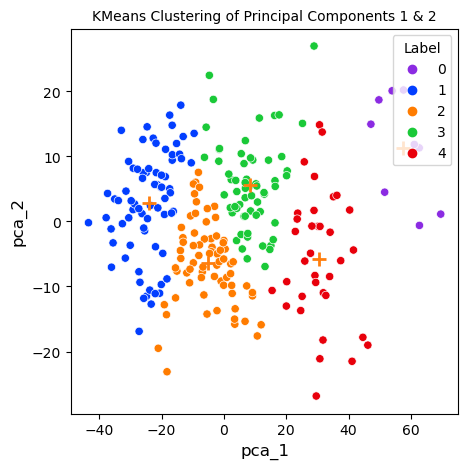

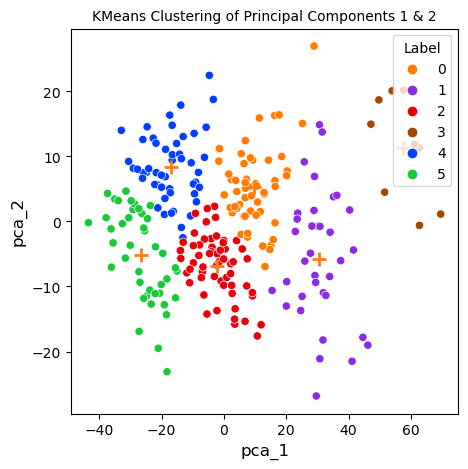

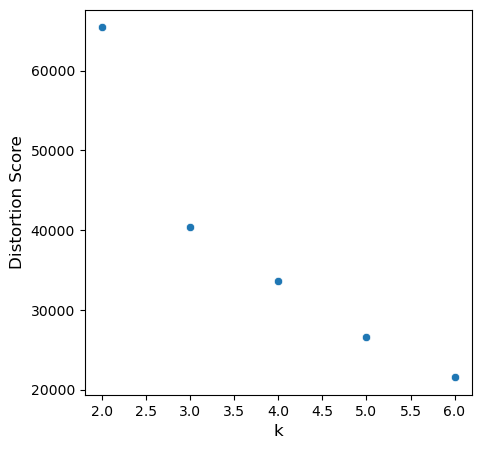

In [38]:
from sklearn.cluster import KMeans
from sklearn import metrics

X_kmeans = pca_df

kmeans_distortion_score = {}
kmeans_silhouette_score = {}

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, init='random').fit(X_kmeans.iloc[:,:2])
    kmeans_centroids_plt = pd.DataFrame(kmeans.cluster_centers_, columns = X_kmeans.columns.values.tolist()[:2])
    X_kmeans['cluster_k{}'.format(k)] = kmeans.labels_
    kmeans_distortion_score[k] = kmeans.inertia_
    colorPalette = 'bright'
    colors = dict(zip(X_kmeans['cluster_k{}'.format(k)].unique(),sns.color_palette(colorPalette)))
    plt.figure(figsize = (5, 5))
    ax = sns.scatterplot(x=X_kmeans.iloc[:,0], y=X_kmeans.iloc[:,1], hue='cluster_k{}'.format(k), palette=colors, data=X_kmeans, edgecolor='white')
    ax = sns.scatterplot(x=kmeans_centroids_plt.iloc[:,0], y=kmeans_centroids_plt.iloc[:,1], data=kmeans_centroids_plt, linewidth=2.0, marker='+', s=100)
    plt.title("KMeans Clustering of Principal Components 1 & 2", fontsize = 10)
    plt.legend(title='Label', loc='upper right', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
df_scores = pd.DataFrame()
df_scores['Distortion Score'] = pd.Series(kmeans_distortion_score)
df_scores.index.name='k'

fig = plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='k', y='Distortion Score', data=df_scores)

df_scores

As expected, K Means was not able to find distinctly clear clusters for k=2. Based on the elbow observed from the Distortion Score, although slight, the optimal cluster number seems to be k =3. However, visually, I think I would say it to be between k = 6 and k = 7

# FEATURE SELECTION

## Unsupervised

- variance threshold
- correlation

These would be roughly validated through the results from different classifiers

### Variance Filtering

In [39]:
# thresh = [0.01, 0.03, 0.04]
# score = score_thr(X, y, clf, models, thr_list = thresh, cv = cv, score = 'g-mean')
# score.style.apply(highlight_max, subset = score.columns[1:], axis = None)

In [40]:
X_var = variance_threshold(X, 0.03)
X_var

,1933,45094,15051,27391,39833,34096,43678,36788,28251,4372,...,24470,34060,24746,45206,36881,37457,9620,20251,6577,8937
ID,,,,,,,,,,,,,,,,,,,,,
NB001,0.320245,0.542494,0.777971,0.799178,0.790262,0.581421,0.530259,0.786932,0.823149,0.565315,...,0.701970,0.559633,0.643469,0.717857,0.530435,0.473373,0.487591,0.740741,0.666667,0.520767
NB003,0.909816,0.142176,0.382480,0.406929,0.207241,0.195628,0.171950,0.169508,0.355140,0.525901,...,0.733990,0.495413,0.749465,0.482143,0.491304,0.491124,0.817518,0.611111,0.488889,0.679446
NB005,0.920245,0.123114,0.116219,0.254844,0.265293,0.160656,0.145053,0.131629,0.283249,0.155405,...,0.527094,0.443425,0.551392,0.626786,0.445652,0.455621,0.310949,0.653086,0.193651,0.418530
NB007,0.241718,0.450357,0.712923,0.795068,0.783396,0.612022,0.512968,0.746212,0.767793,0.453829,...,0.517241,0.483180,0.723769,0.562500,0.421739,0.621302,0.328467,0.706173,0.634921,0.542066
NB009,0.953374,0.196187,0.376409,0.361127,0.335830,0.236066,0.224784,0.360795,0.457225,0.543919,...,0.539409,0.617737,0.745182,0.525000,0.617391,0.695266,0.751825,0.600000,0.523810,0.706070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB489,0.894479,0.030977,0.017346,0.068115,0.111111,0.021858,0.028818,0.028409,0.076204,0.030405,...,0.645320,0.691131,0.207709,0.403571,0.400000,0.576923,0.145985,0.609877,0.476190,0.485623
NB491,0.284663,0.256553,0.627060,0.716970,0.713483,0.422951,0.186359,0.603220,0.675054,0.277027,...,0.302956,0.544343,0.495717,0.546429,0.245652,0.363905,0.213139,0.635802,0.485714,0.457934
NB493,0.198773,0.829230,0.819601,0.829125,0.827715,0.782514,0.759846,0.729167,0.867721,0.814189,...,0.645320,0.538226,0.642398,0.558929,0.597826,0.647929,0.344526,0.650617,0.419048,0.821086


### Correlation Filtering

How long this takes to run.
start time: 4:23 pm
stop time: 4:30 or so pm

In [41]:
X_cor = correlation_drop(X_var, 0.9)
X_cor

,1933,45094,16149,36904,21890,24037,33296,37133,2001,22282,...,24470,34060,24746,45206,36881,37457,9620,20251,6577,8937
ID,,,,,,,,,,,,,,,,,,,,,
NB001,0.320245,0.542494,0.737705,0.901252,0.757062,0.823110,0.903151,0.463235,0.838162,0.863824,...,0.701970,0.559633,0.643469,0.717857,0.530435,0.473373,0.487591,0.740741,0.666667,0.520767
NB003,0.909816,0.142176,0.900149,0.150904,0.646893,0.924394,0.208868,0.528361,0.822178,0.796424,...,0.733990,0.495413,0.749465,0.482143,0.491304,0.491124,0.817518,0.611111,0.488889,0.679446
NB005,0.920245,0.123114,0.168405,0.134214,0.197740,0.323823,0.151692,0.134454,0.309690,0.345254,...,0.527094,0.443425,0.551392,0.626786,0.445652,0.455621,0.310949,0.653086,0.193651,0.418530
NB007,0.241718,0.450357,0.925484,0.235744,0.902542,0.921541,0.793466,0.599790,0.848152,0.858322,...,0.517241,0.483180,0.723769,0.562500,0.421739,0.621302,0.328467,0.706173,0.634921,0.542066
NB009,0.953374,0.196187,0.800298,0.199583,0.823446,0.818830,0.268378,0.236345,0.850150,0.833563,...,0.539409,0.617737,0.745182,0.525000,0.617391,0.695266,0.751825,0.600000,0.523810,0.706070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NB489,0.894479,0.030977,0.013413,0.040334,0.033898,0.452211,0.023337,0.217437,0.513487,0.037139,...,0.645320,0.691131,0.207709,0.403571,0.400000,0.576923,0.145985,0.609877,0.476190,0.485623
NB491,0.284663,0.256553,0.068554,0.844228,0.131356,0.122682,0.663944,0.650210,0.779221,0.185695,...,0.302956,0.544343,0.495717,0.546429,0.245652,0.363905,0.213139,0.635802,0.485714,0.457934
NB493,0.198773,0.829230,0.257824,0.582754,0.235876,0.255350,0.577596,0.195378,0.115884,0.330124,...,0.645320,0.538226,0.642398,0.558929,0.597826,0.647929,0.344526,0.650617,0.419048,0.821086


## VISUALIZATION

#### PCA after correlation

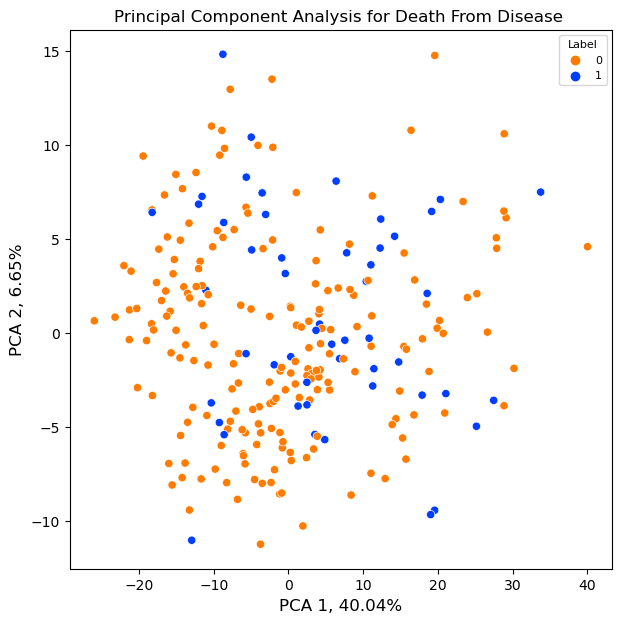

In [42]:
plot_graph(X_cor, y, "pca", title_ = 12, axis_ = 12, legend_ = 8)

#### SelectKBest Top 30 features

<Figure size 700x700 with 0 Axes>

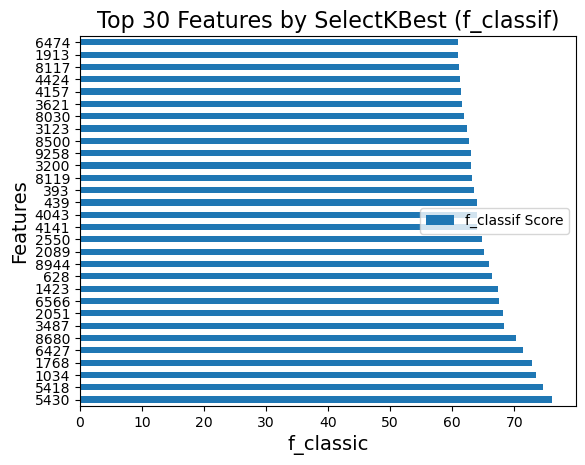

In [43]:
X_visuals = kbest_topfeatures(X_cor, y, top = 30)

#### Heatmap based on SelectKBest

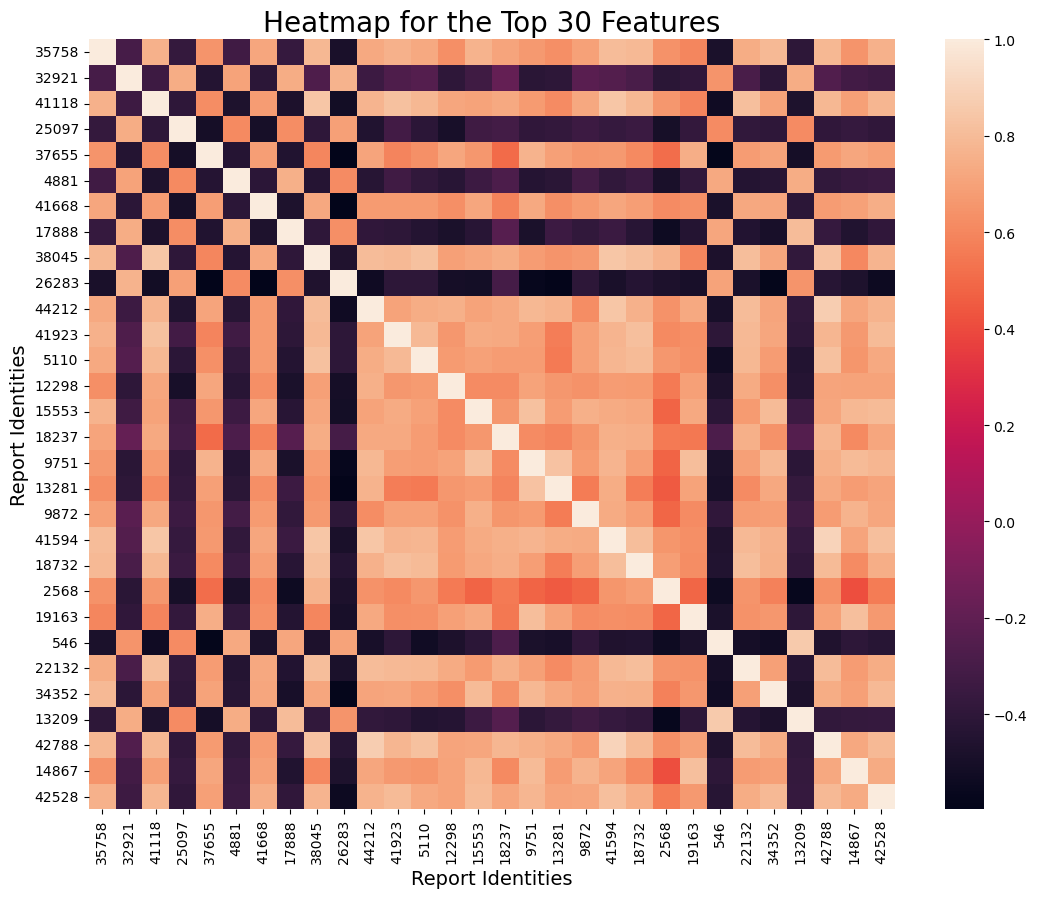

In [44]:
plot_graph(X_visuals, y, which = "heatmap", width = 13, height = 10, title_ = 20)

#### Boxplot based on SelectKBest: Death from Disease

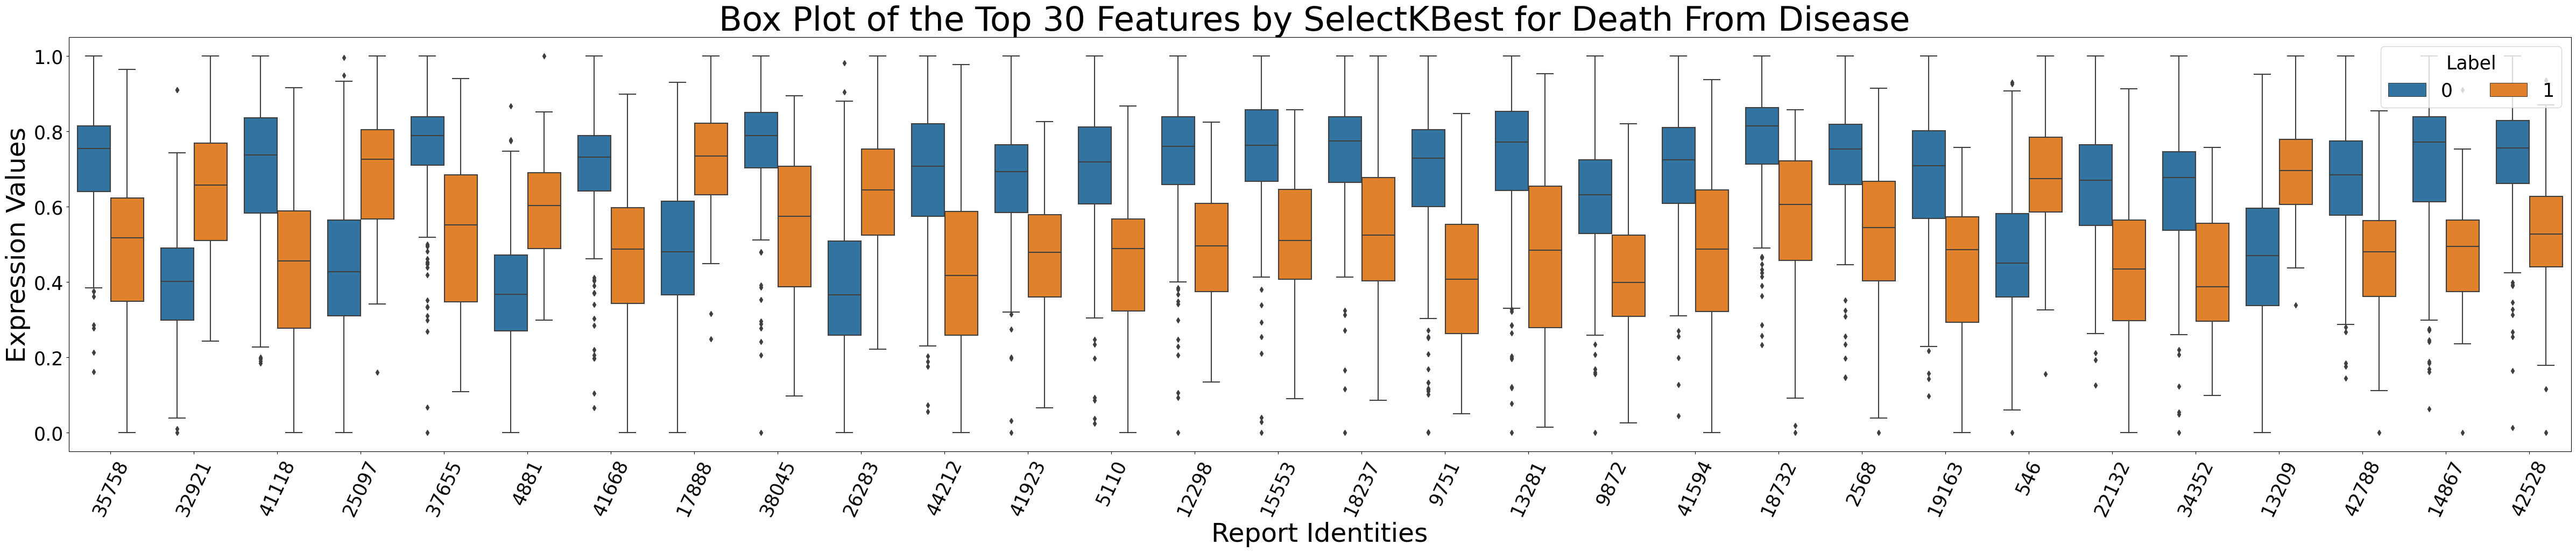

In [45]:
plot_graph(X_visuals, y, which = "boxplot", width = 60, height = 10, title_ = 45, ticks_ = 25, axis_ = 35, legend_ = 25)

#### Boxplot based on SelectKBest: INSS Stage

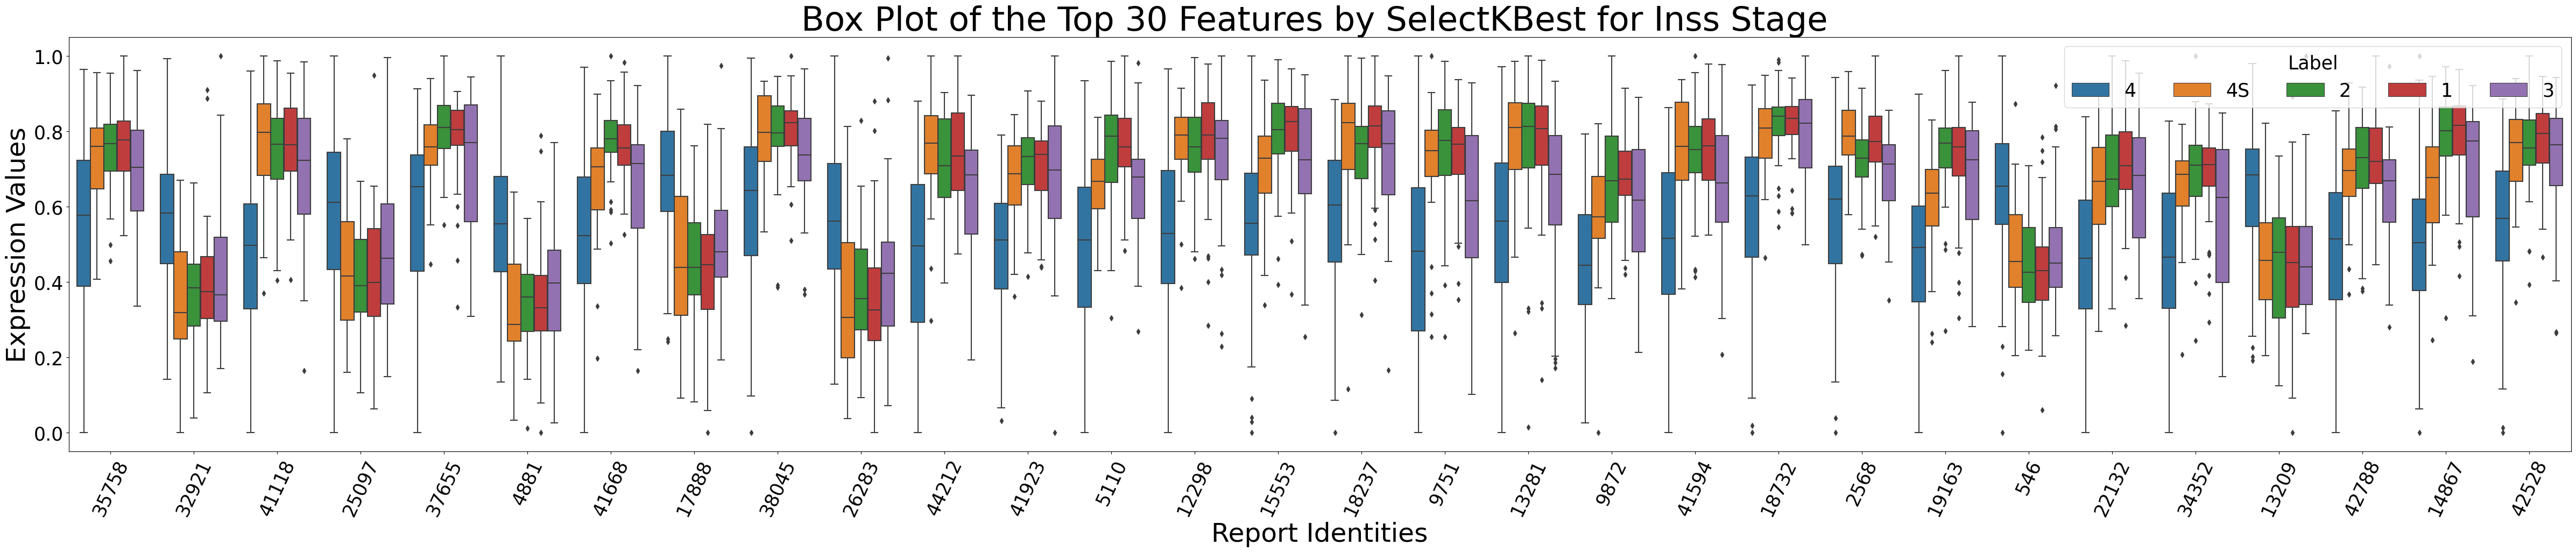

In [46]:
y = label_dict['INSS Stage']
plot_graph(X_visuals, y, which = "boxplot", width = 60, height = 10, title_ = 45, ticks_ = 25, axis_ = 35, legend_ = 25)

# MODEL SELECTION: Steps in choosing the Classifier

### Death From Disease

In [47]:
y = label_dict['Death from Disease']

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

clf = ['Logistic', 
       'RandomForest']

models = [LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators = 200, random_state = 0)]

kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state = 0)

For the binary classifications, I would use roc_auc and g-mean
- roc_auc because it considers the two classes of equal weight when predicting probabilities for the two classes
- g-mean (geometric mean) because it considers the two classes of equal weight when predicting them. It is not an error metric in and of itself but consists of error metrics, specificity and sensitivity. It is the square root of the product of the sensitivity and specificity

In [49]:
score(X_cor, y, clf, models, cv = kf, sc = 'roc_auc')

,Classifier,Roc_Auc,StDev
0,Logistic,0.907561,0.066792
1,RandomForest,0.888890,0.058376


In [50]:
score(X_cor, y, clf, models, cv = kf, sc = 'g-mean')

,Classifier,G-Mean,StDev
0,Logistic,0.705705,0.206553
1,RandomForest,0.566248,0.265839


Logistic Regression wins so we would choose this as our classifier. But now we have to choose an appropriate number of features based on SelectKBest top features and the corresponding metric scores!

### Choosing number of features based on SelectKBest and GridSearchCV

GridSearchCV is how we would choose the best feature amount based on the selected metric performance

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold

features_ = [20, 50, 100, 150, 500, 1000]
No_of_features = pd.DataFrame({"No_of_features": features_})

kf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=0)
scores_ = ['g-mean', 'roc_auc']
    
for i in scores_:
    score_df = []
    if i == 'g-mean':
        name = i
        scorer = make_scorer(geometric_mean_score, greater_is_better=True)
    else:
        name = i
        scorer = i
        
    for j in features_:
        X_red = kbest_topfeatures(X_cor, y, top = j, show=False)
        logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
        parameters = {'max_iter': [20, 50, 100, 500, 1000]}
        logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, scoring = scorer)
        logistic_grid.fit(X_red,y)
        score_df.append(logistic_grid.best_score_)
    No_of_features[name.title()] = score_df
    No_of_features.sort_values(by = name.title(), ascending = False, inplace = True)
    No_of_features.reset_index(drop = True, inplace = True)

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [52]:
No_of_features.style.apply(highlight_max, subset = No_of_features.columns[1:], axis = None)

,No_of_features,G-Mean,Roc_Auc
0,20,0.663004,0.910310
1,150,0.689692,0.909573
2,50,0.646717,0.908491
3,100,0.697653,0.903725
4,500,0.718339,0.900953
5,1000,0.718179,0.900819


In [53]:
No_of_features

,No_of_features,G-Mean,Roc_Auc
0,20,0.663004,0.910310
1,150,0.689692,0.909573
2,50,0.646717,0.908491
3,100,0.697653,0.903725
4,500,0.718339,0.900953
5,1000,0.718179,0.900819


500 seems ideal! Not too much and scores are relatively good.

In [54]:
X_red = kbest_topfeatures(X_cor, y, top = 500, show=False)
logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
parameters = {'max_iter': [20, 50, 100, 500, 1000]}
logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, refit = True,
                             scoring = make_scorer(geometric_mean_score, greater_is_better=True))
logistic_grid.fit(X_red,y)
best_logistic_model_dd = logistic_grid.best_estimator_
X_red_dd = X_red

<Figure size 700x700 with 0 Axes>

### High Risk

In [55]:
y = label_dict['High Risk']

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

clf = ['Logistic', 
       'RandomForest']

models = [LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators = 200, random_state = 0)]

kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state = 0)

In [57]:
score(X_cor, y, clf, models, cv = kf, sc = 'roc_auc')

,Classifier,Roc_Auc,StDev
0,Logistic,0.982830,0.021332
1,RandomForest,0.957713,0.047675


In [58]:
score(X_cor, y, clf, models, cv = kf, sc = 'g-mean')

KeyboardInterrupt: 

Logistic Regression wins

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

features_ = [20, 50, 100, 150, 500, 1000]
No_of_features = pd.DataFrame({"No_of_features": features_})

kf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=0)
scores_ = ['g-mean', 'roc_auc']
    
for i in scores_:
    score_df = []
    if i == 'g-mean':
        name = i
        scorer = make_scorer(geometric_mean_score, greater_is_better=True)
    else:
        name = i
        scorer = i
        
    for j in features_:
        X_red = kbest_topfeatures(X_cor, y, top = j, show=False)
        logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
        parameters = {'max_iter': [20, 50, 100, 500, 1000]}
        logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, scoring = scorer)
        logistic_grid.fit(X_red,y)
        score_df.append(logistic_grid.best_score_)
    No_of_features[name.title()] = score_df
    No_of_features.sort_values(by = name.title(), ascending = False, inplace = True)
    No_of_features.reset_index(drop = True, inplace = True)

In [ ]:
No_of_features

The higher the features the better, but the results for 150 are not too different from 1000, so I will go with 150

In [ ]:
X_red = kbest_topfeatures(X_cor, y, top = 150, show=False)
logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
parameters = {'max_iter': [20, 50, 100, 500, 1000]}
logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, refit = True,
                             scoring = make_scorer(geometric_mean_score, greater_is_better=True))
logistic_grid.fit(X_red,y)
best_logistic_model_hr = logistic_grid.best_estimator_
X_red_hr = X_red

### Progression

In [ ]:
y = label_dict['Progression']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

clf = ['Logistic', 
       'RandomForest']

models = [LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators = 200, random_state = 0)]

kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state = 0)

In [ ]:
score(X_cor, y, clf, models, cv = kf, sc = 'roc_auc')

In [ ]:
score(X_cor, y, clf, models, cv = kf, sc = 'g-mean')

Logistic Regression wins

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

features_ = [20, 50, 100, 150, 500, 1000]
No_of_features = pd.DataFrame({"No_of_features": features_})

kf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=0)
scores_ = ['g-mean', 'roc_auc']
    
for i in scores_:
    score_df = []
    if i == 'g-mean':
        name = i
        scorer = make_scorer(geometric_mean_score, greater_is_better=True)
    else:
        name = i
        scorer = i
        
    for j in features_:
        X_red = kbest_topfeatures(X_cor, y, top = j, show=False)
        logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
        parameters = {'max_iter': [20, 50, 100, 500, 1000]}
        logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, scoring = scorer)
        logistic_grid.fit(X_red,y)
        score_df.append(logistic_grid.best_score_)
    No_of_features[name.title()] = score_df
    No_of_features.sort_values(by = name.title(), ascending = False, inplace = True)
    No_of_features.reset_index(drop = True, inplace = True)

In [ ]:
No_of_features

Highest G-Mean = 150, so 150 features it is

In [ ]:
X_red = kbest_topfeatures(X_cor, y, top = 150, show=False)
logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
parameters = {'max_iter': [20, 50, 100, 500, 1000]}
logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, refit = True,
                             scoring = make_scorer(geometric_mean_score, greater_is_better=True))
logistic_grid.fit(X_red,y)
best_logistic_model_pr = logistic_grid.best_estimator_
X_red_pr = X_red

### INSS Stage

In [ ]:
y = label_dict['INSS Stage']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

clf = ['Logistic', 
       'RandomForest']

models = [LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators = 200, random_state = 0)]

kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state = 0)

I will choose f1_weighted as the scoring metric this time because it is more suited to multi-class data

In [ ]:
score(X_cor, y, clf, models, cv = kf, sc = 'f1_weighted')

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

features_ = [20, 50, 100, 150, 500, 1000]
No_of_features = pd.DataFrame({"No_of_features": features_})

kf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=0)
scores_ = ['f1_weighted']
    
for i in scores_:
    score_df = []
    if i == 'g-mean':
        name = i
        scorer = make_scorer(geometric_mean_score, greater_is_better=True)
    else:
        name = i
        scorer = i
        
    for j in features_:
        X_red = kbest_topfeatures(X_cor, y, top = j, show=False)
        logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
        parameters = {'max_iter': [20, 50, 100, 500, 1000]}
        logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, scoring = scorer)
        logistic_grid.fit(X_red,y)
        score_df.append(logistic_grid.best_score_)
    No_of_features[name.title()] = score_df
    No_of_features.sort_values(by = name.title(), ascending = False, inplace = True)
    No_of_features.reset_index(drop = True, inplace = True)

In [ ]:
No_of_features

500 seems ideal!

In [ ]:
X_red = kbest_topfeatures(X_cor, y, top = 500, show=False)
logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 0)
parameters = {'max_iter': [20, 50, 100, 500, 1000]}
logistic_grid = GridSearchCV(logistic_model, parameters, cv = kf, n_jobs = -1, refit = True,
                             scoring = 'f1_weighted')
logistic_grid.fit(X_red,y)
best_logistic_model_inss = logistic_grid.best_estimator_
X_red_inss = X_red

# PREDICTIONS

In [ ]:
X_test = df_ma.transpose()[df_patient_info['FactorValue..death.from.disease.'].isna()]
X_test = normalize(X_test)
X_test = normalize(X_test, RobustScaler())
X_test = normalize(X_test, MinMaxScaler())

In [ ]:
X_test_dd = X_test[X_red_dd.columns]
X_test_hr = X_test[X_red_hr.columns]
X_test_pr = X_test[X_red_pr.columns]
X_test_inss = X_test[X_red_inss.columns]

In [ ]:
y_predicted_dd = best_logistic_model_dd.predict(X_test_dd)
y_predicted_hr = best_logistic_model_hr.predict(X_test_hr)
y_predicted_pr = best_logistic_model_pr.predict(X_test_pr)
y_predicted_inss = best_logistic_model_inss.predict(X_test_inss)

In [ ]:
y_predict_probab_dd = best_logistic_model_dd.predict_proba(X_test_dd)
y_predict_probab_hr = best_logistic_model_hr.predict_proba(X_test_hr)
y_predict_probab_pr = best_logistic_model_pr.predict_proba(X_test_pr)
y_predict_probab_inss = best_logistic_model_inss.predict_proba(X_test_inss)

In [ ]:
pred_lab_dd = pd.DataFrame(y_predicted_dd, columns = ['Death from Disease'], index = X_test_dd.index)
pred_lab_hr = pd.DataFrame(y_predicted_hr, columns = ['High Risk'], index = X_test_hr.index)
pred_lab_pr = pd.DataFrame(y_predicted_pr, columns = ['Progression'], index = X_test_pr.index)
pred_lab_inss = pd.DataFrame(y_predicted_inss, columns = ['INSS Stage'], index = X_test_inss.index)

In [ ]:
pred_prob_lab_dd = pd.DataFrame(y_predict_probab_dd, columns = ['DeathFromDisease0', 'DeathFromDisease1'], index = X_test_dd.index)
pred_prob_lab_hr = pd.DataFrame(y_predict_probab_hr, columns = ['HighRisk0', 'HighRisk1'], index = X_test_hr.index)
pred_prob_lab_pr = pd.DataFrame(y_predict_probab_pr, columns = ['Progression0', 'Progression1'], index = X_test_pr.index)
pred_prob_lab_inss = pd.DataFrame(y_predict_probab_inss, columns = ['INSS1', 'INSS2', 'INSS3', 'INSS4', 'INSS4S'], index = X_test_inss.index)

In [ ]:
output_df = pd.concat([pred_prob_lab_dd,pred_lab_dd, pred_prob_lab_hr,pred_lab_hr, 
                       pred_prob_lab_pr,pred_lab_pr, pred_prob_lab_inss,pred_lab_inss],
                     axis = 1)
output_df.to_csv('Predicted Labels and Their Probabilities.csv')
output_df